# Tutorial 5
## 6.1
(a)
\begin{align}
&P(\theta_A,\theta_B)\nonumber\\
=&P(\theta,\gamma)\large|\small{\frac{\partial (\theta_A,\theta_B)}{\partial (\theta,\gamma)}}\large|\nonumber\\
=&P(\theta)P(\gamma)\theta\nonumber\\
=&P_\theta(\theta_A)P_\gamma(\frac{\theta_B}{\theta_A})\theta_A\nonumber
\end{align} 


\begin{align}
&P(\theta_A)P(\theta_B)\nonumber\\
=&P_\theta(\theta_A)\int^\infty_0 \frac{1}{\theta}P_{\gamma}(\frac{\theta_B}{\theta})P_\theta(\theta)d\theta\nonumber
\end{align}

In most circumstance,the part $P_\gamma(\frac{\theta_B}{\theta_A})\theta_A$ is a fuction of $\theta_A$ and $\theta_B$ since the $P_\gamma(\frac{\theta_B}{\theta_A})$ is the density of Gamma distribution.
Thus the part $P_\gamma(\frac{\theta_B}{\theta_A})\theta_A$ is unequal to the part $P(\theta_B)$ which is only function of $\theta_B$

So in most circumstance 
$$
P(\theta_A,\theta_B)\neq P(\theta_A)P(\theta_B)
$$
which means the $\theta_A$ and $\theta_B$ are dependent.But with some restrictions to hyperparameters we may get the independent $\theta_A$ and $\theta_B$.The restriction can be derive as below.

The keneral of $P_\gamma(\frac{\theta_B}{\theta_A})\theta_A$ is $(\frac{\theta_B}{\theta_A})^{(a_\gamma-1)}e^{-(b_\gamma\frac{\theta_B}{\theta_A})}\theta_A$. To make it become only a function of $\theta_B$ , we need $a_\gamma=2,b_\gamma=0$.

(b)
\begin{align}
&P(\theta|\bold{y}_A,\bold{y}_B,\gamma)\nonumber\\
\varpropto&P(\theta)P(\bold{y}_A|\theta)P(\bold{y}_B|\theta,\gamma)\nonumber\\
\varpropto&\theta^{a_\theta-1}e^{-(b_\theta\theta)}\theta^{\sum_A y_A+\sum_B y_B}e^{-(n_A\theta+n_B\theta\gamma)}\nonumber\\
\varpropto&\theta^{[(a_\theta+\sum_{A}{} y_A+\sum_{B}{} y_B)-1]}
e^{-\theta(b_\theta+n_A+n_B\gamma)}\nonumber
\end{align}
So the form is $$P(\theta|\bold{y}_A,\bold{y}_B,\gamma)\sim\Gamma(a_\theta+\sum_{i=1}^{58} y_{Ai}+\sum_{j=1}^{218} y_{Bj},b_\theta+58+218\gamma)$$


In [1]:
y_A<-read.table('menchild30bach.txt')
y_B<-read.table('menchild30nobach.txt')
nA<-nrow(y_A)
nB<-nrow(y_B)
c(nA,nB)

[1]  58 218

(c)
\begin{align}
&P(\gamma|\bold{y}_A,\bold{y}_B,\theta)\nonumber\\
\varpropto&P(\gamma)P(\bold{y}_B|\theta,\gamma)\nonumber\\
\varpropto&\gamma^{a_\gamma-1}e^{-(b_\gamma\gamma)}\gamma^{\sum_B y_B}e^{-n_B\theta\gamma}\nonumber\\
\varpropto&\gamma^{a_\gamma+\sum_{j=1}^{218} y_{Bj}-1}e^{-(b_\gamma+n_B\theta)\gamma}\nonumber
\end{align}
So the form is 
$$P(\gamma|\bold{y}_A,\bold{y}_B,\theta)\sim\Gamma(a_\gamma+\sum_{j=1}^{218}y_{Bj},b_\gamma+218\theta)$$


(d)

The bigger parameters are, the smaller $E[\theta_B-\theta_A|\bold{y}_A,\bold{y}_B]$ is.

In [2]:
a_theta<-2
b_theta<-1
a_gamma<-c(8,16,32,64,128)
b_gamma<-a_gamma
sum_yA<-sum(y_A)
sum_yB<-sum(y_B)
n_ite<-5000
par_initial<-1
theta<-par_initial
gamma<-par_initial
Theta<-matrix(nrow=n_ite,ncol=length(a_gamma))
Gamma<-Theta
E<-NULL
for (j in 1:length(a_gamma)){
    a_g<-a_gamma[j]
    b_g<-a_g
    for (i in 1:n_ite){
        theta<-rgamma(1,shape=a_theta+sum_yA+sum_yB,rate=b_theta+nA+nB*gamma)
        gamma<-rgamma(1,shape=a_g+sum_yB,rate=b_g+nB*theta)
        Theta[i,j]<-theta
        Gamma[i,j]<-gamma
    }
}
# E<-rowSums(Theta*Gamma-Theta)
E<-colSums(Theta*Gamma-Theta)/n_ite
E

[1] 0.3776461 0.3344446 0.2736529 0.2005181 0.1337200

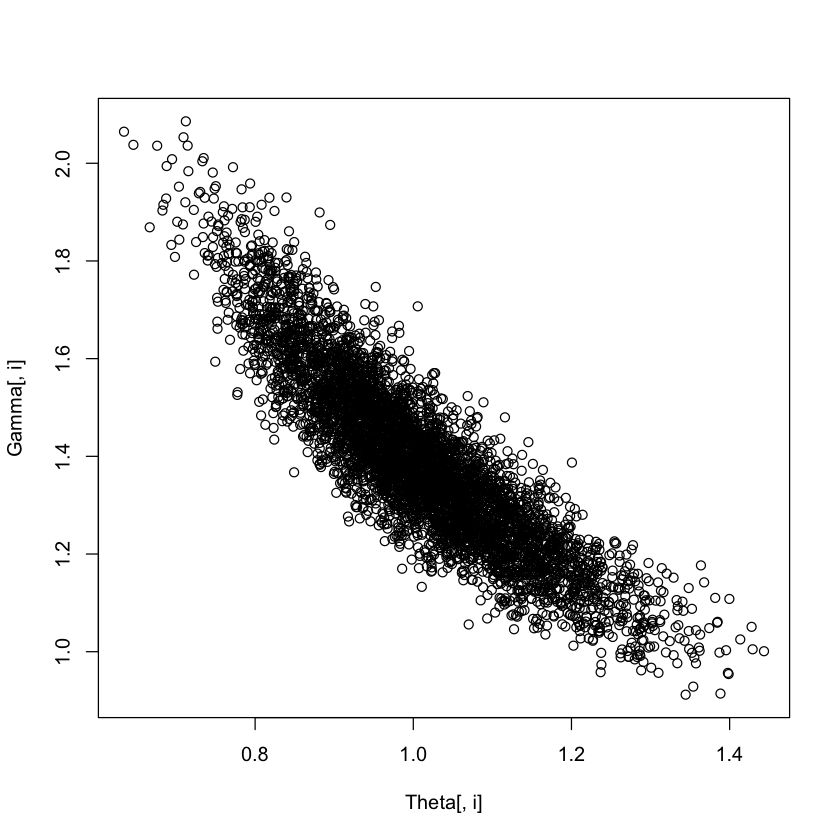

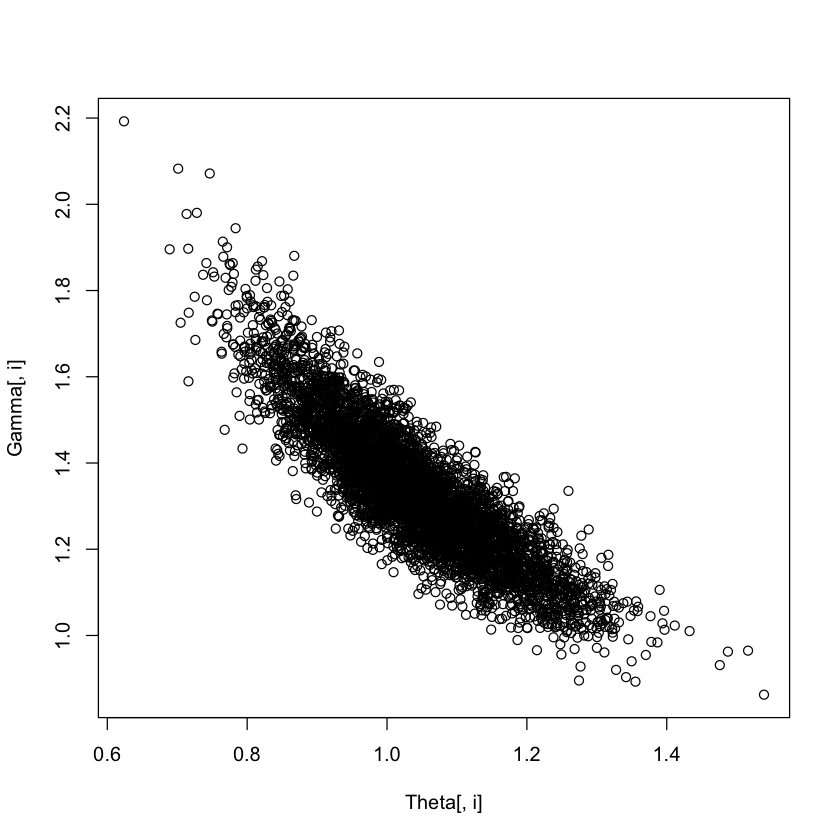

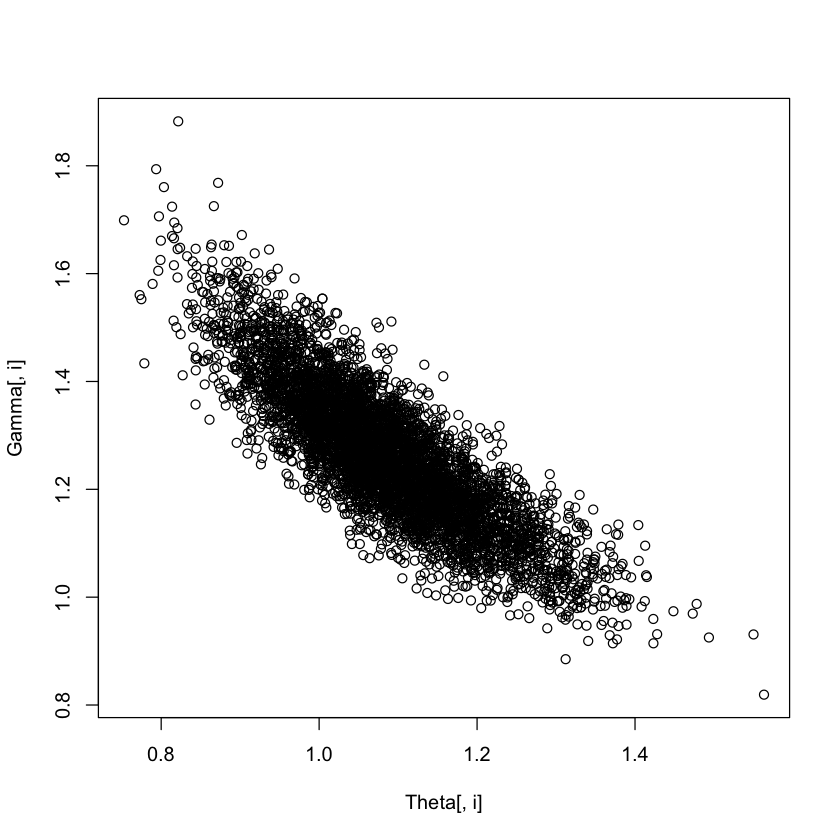

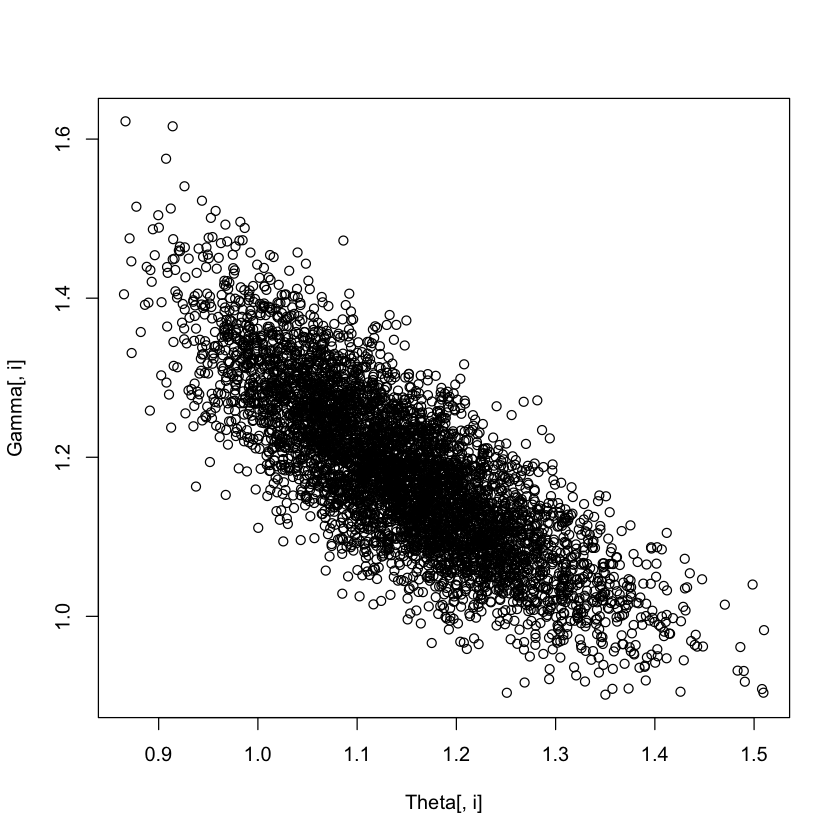

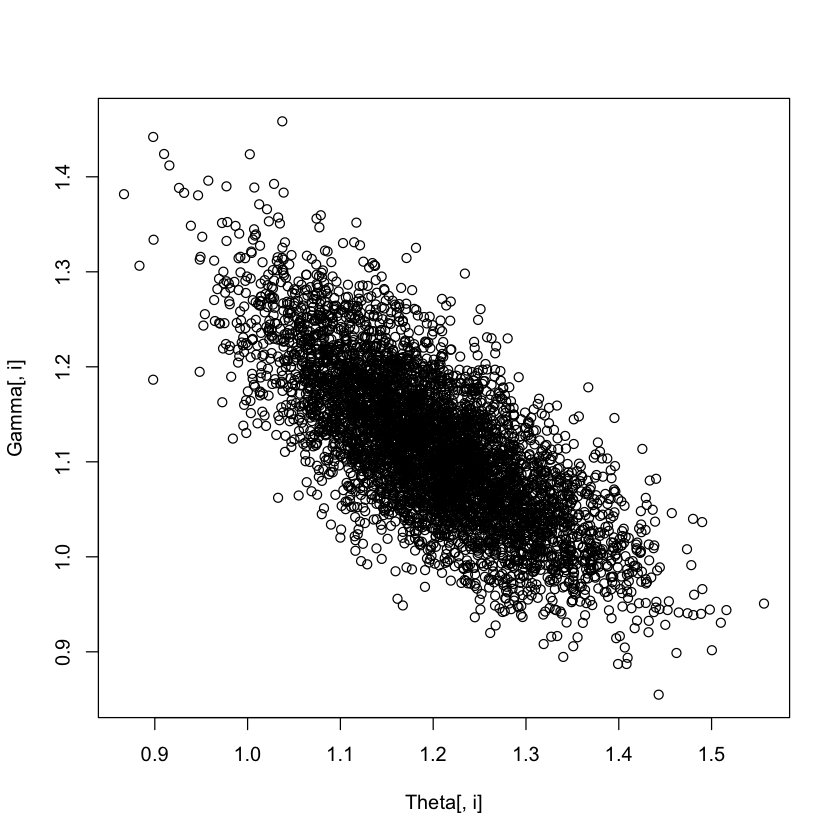

In [3]:
par(bg='white')
for (i in 1:5){
    plot(Theta[,i],Gamma[,i])
}


Call:
	density.default(x = x)

Data: x (532 obs.);	Bandwidth 'bw' = 7.951

       x                y            
 Min.   : 32.15   Min.   :1.949e-06  
 1st Qu.: 79.82   1st Qu.:8.760e-04  
 Median :127.50   Median :3.844e-03  
 Mean   :127.50   Mean   :5.239e-03  
 3rd Qu.:175.18   3rd Qu.:8.801e-03  
 Max.   :222.85   Max.   :1.424e-02  

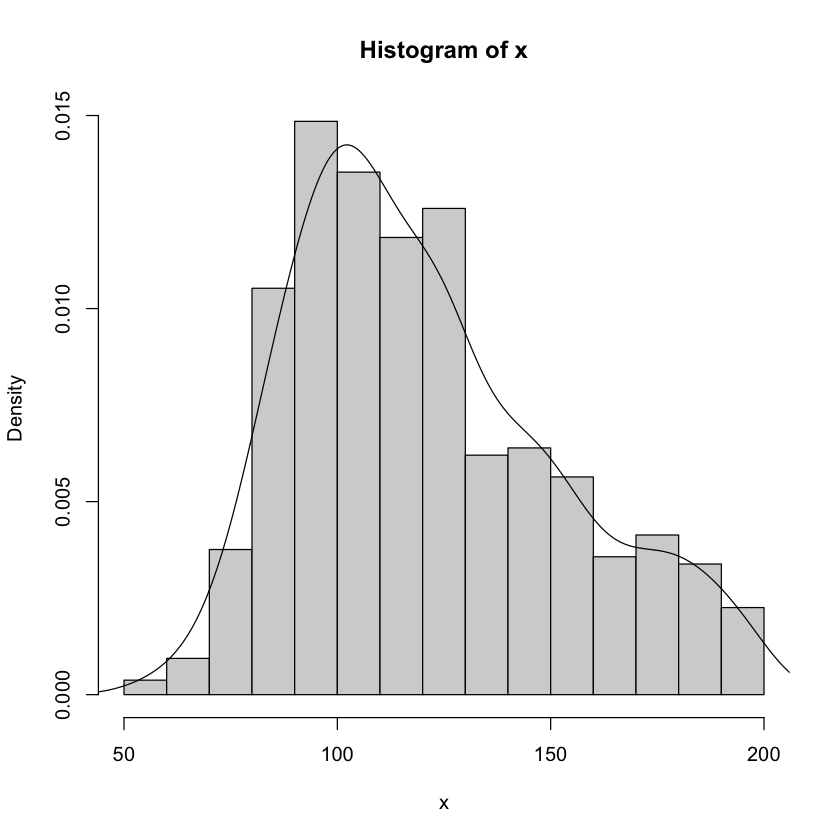

In [26]:
glucose=read.table("glucose.dat")
x<-glucose$V1
par(bg='white')
hist(x,prob=TRUE)
lines(density(x))
density(x)

In [13]:
help(data)

data                   package:utils                   R Documentation

_D_a_t_a _S_e_t_s

_D_e_s_c_r_i_p_t_i_o_n:

     Loads specified data sets, or list the available data sets.

_U_s_a_g_e:

     data(..., list = character(), package = NULL, lib.loc = NULL,
          verbose = getOption("verbose"), envir = .GlobalEnv,
          overwrite = TRUE)
     
_A_r_g_u_m_e_n_t_s:

     ...: literal character strings or names.

    list: a character vector.

 package: a character vector giving the package(s) to look in for data
          sets, or 'NULL'.

          By default, all packages in the search path are used, then
          the 'data' subdirectory (if present) of the current working
          directory.

 lib.loc: a character vector of directory names of R libraries, or
          'NULL'.  The default value of 'NULL' corresponds to all
          libraries currently known.

 verbose: a logical.  If 'TRUE', additional diagnostics are printed.

   envir: